# SMOOTHING ANALYSIS WITH CORRECTION

In [46]:
import ipywidgets as widgets
from ipywidgets import fixed, Layout, Button, Box
from ipywidgets import Layout, HTML, VBox

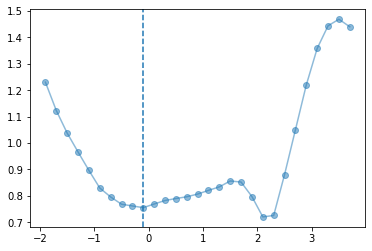

In [68]:
#RUNNING THE NOTEBOOKS
%run NDVI_smoothing.ipynb

In [ ]:
%run LST_smoothing.ipynb

In [69]:
#CREATING THE NDVI WIDGETS

#location widget
loc_list = list(set(ndvi_MOD.index.values))
loc_list.sort()
ndvi_location = widgets.Dropdown(
    options=loc_list,
    value='AFG01a',
    description='Select point:')

#satellite widget
ndvi_satellite = widgets.Dropdown(
    options=['MOD', 'MYD', 'MXD'],
    value='MXD',
    description='Satellite:')

# asymetric p widget
ndvi_pval = widgets.BoundedFloatText(
    value=0.9,
    min=0.05,
    max=0.95,
    step=0.05,
    description='p values:'
)

ndvi_pvalbool = widgets.Checkbox(
    value=False,
    description='No pvalue',
)


# 16 days srange widget
ndvi_l1 = widgets.FloatRangeSlider(
    value=[-2, 4],
    min=-10,
    max=10,
    step=0.5,
    description='A0 and A1:')
ndvi_l1.style.handle_color = 'lightblue'

#daily srange widget
ndvi_l2 = widgets.FloatRangeSlider(
    value=[1, 6],
    min=-10,
    max=10,
    step=0.5,
    description='A2 and A3:')
ndvi_l2.style.handle_color = 'lightblue'

#srange step widget
ndvi_s = widgets.FloatSlider(
    value=0.2,
    min=0.05,
    max=0.6,
    step=0.05,
    description='step:')
ndvi_s.style.handle_color = 'lightblue'

#year widget
ndvi_year = widgets.Dropdown(
    options=list(range(2002,2020)),
    value=2010,
    description='Year:')

#srange step widget
ndvi_month = widgets.IntSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='Offset')
ndvi_month.style.handle_color = 'lightblue'

ndvi_d1 = widgets.DatePicker(
    description='from',
    value = datetime.date(2002,7,4),
)

ndvi_d2 = widgets.DatePicker(
    description='to',
    value = datetime.date(2020,5,16)
)

ndvi_ybool = widgets.Checkbox(
    value=True,
    description='automatic',
)

ndvi_ylimits = widgets.FloatRangeSlider(
    value=[0, 0.5],
    min=-0.5,
    max=1,
    step=0.1,
    description='Y axis limits:')
ndvi_ylimits.style.handle_color = 'lightblue'

In [70]:
#CREATING THE LST WIDGETS

#location widget
loc_list = list(set(lst_MYD.index.values))
loc_list.sort()
lst_location = widgets.Dropdown(
    options=loc_list,
    value='AFG01a',
    description='Select point:')

#dataset widget
lst_dataset = widgets.Dropdown(
    options=['LTD', 'LTN'],
    value='LTD',
    description='Dataset:')


# asymetric p widget
lst_pval = widgets.BoundedFloatText(
    value=0.9,
    min=0.05,
    max=0.95,
    step=0.05,
    description='p values:'
)

lst_pvalbool = widgets.Checkbox(
    value=False,
    description='No pvalue',
)

# 8 days srange widget
lst_l1 = widgets.FloatRangeSlider(
    value=[-2, 4],
    min=-10,
    max=10,
    step=0.5,
    description='A0 and A1:')
lst_l1.style.handle_color = 'lightblue'

#daily srange widget
lst_l2 = widgets.FloatRangeSlider(
    value=[1, 6],
    min=-10,
    max=10,
    step=0.5,
    description='A2:')
lst_l2.style.handle_color = 'lightblue'

#srange step widget
lst_s = widgets.FloatSlider(
    value=0.2,
    min=0.05,
    max=0.6,
    step=0.05,
    description='step:')
lst_s.style.handle_color = 'lightblue'

#year widget
lst_year = widgets.Dropdown(
    options=list(range(2002,2020)),
    value=2010,
    description='Year:')

#srange step widget
lst_month = widgets.IntSlider(
    value=1,
    min=1,
    max=12,
    step=1,
    description='Offset')
lst_month.style.handle_color = 'lightblue'

lst_d1 = widgets.DatePicker(
    description='from',
    value = datetime.date(2002,7,4)
)

lst_d2 = widgets.DatePicker(
    description='to',
    value = datetime.date(2020,5,16)
)

lst_ybool = widgets.Checkbox(
    value=True,
    description='automatic',
)

lst_ylimits = widgets.FloatRangeSlider(
    value=[250, 300],
    min=220,
    max=350,
    step=10,
    description='Y axis limits:')
lst_ylimits.style.handle_color = 'lightblue'



In [71]:
#NDVI CHOOSE DISPLAYED CURVES WIDGETS

ndvi_A0 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='blue'>{'A0 : '}</b> Raw values filtered",
    indent=False
)

ndvi_A1 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='green'>{'A1 : '}</b> Raw values filtered + midpoint interpolation",
    indent=False
)

ndvi_A2 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='red'>{'A2 : '}</b> Midpoint shift + filtering",
    indent=False
)

ndvi_A3 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='orange'>{'A3 : '}</b> Real point shift + filtering",
    indent=False
)


ndvi_switch = widgets.VBox([widgets.HTML(value = f"<b>{'Select curves to display'}</b>"), ndvi_A0, ndvi_A1, ndvi_A2, ndvi_A3], 
                           layout = Layout(display='flex', border = 'solid', width='100%'))

In [72]:
#LST CHOOSE DISPLAYED CURVES WIDGETS

lst_A0 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='blue'>{'A0 : '}</b> Raw 8 days values filtered",
    indent=False
)

lst_A1 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='green'>{'A1 : '}</b> Raw 8 days values filtered + midpoint interpolation",
    indent=False
)

lst_A2 = widgets.Checkbox(
    value=True,
    description=f"<b><font color='red'>{'A2 : '}</b> Daily values filtered",
    indent=False
)


lst_switch = widgets.VBox([widgets.HTML(value = f"<b>{'Select curves to display'}</b>"), lst_A0, lst_A1, lst_A2], 
                          layout = Layout(display='flex', border = 'solid', width='100%'))

In [73]:
subox_layout = Layout(display='flex',
                    width='100%')

ndvi_ui1 = widgets.VBox([ndvi_location, ndvi_satellite, ndvi_pval, ndvi_pvalbool], layout=subox_layout)
ndvi_ui2 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Srange'}</b>"), ndvi_l1, ndvi_l2, ndvi_s], layout=subox_layout)
ndvi_ui3 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Date Range'}</b>"), ndvi_d1, ndvi_d2], layout=subox_layout)
ndvi_ui4 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Year plot'}</b>"), ndvi_year, ndvi_month], layout=subox_layout)
ndvi_ui5 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Y axis'}</b>"), ndvi_ylimits, ndvi_ybool], layout=subox_layout)

ndvi_ui = widgets.VBox([ndvi_switch, ndvi_ui1, ndvi_ui2, ndvi_ui3, ndvi_ui4, ndvi_ui5])

lst_ui1 = widgets.VBox([lst_location, lst_dataset, lst_pval, lst_pvalbool], layout=subox_layout)
lst_ui2 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Srange'}</b>"), lst_l1, lst_l2, lst_s], layout=subox_layout)
lst_ui3 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Date Range'}</b>"), lst_d1, lst_d2], layout=subox_layout)
lst_ui4 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Year plot'}</b>"), lst_year, lst_month], layout=subox_layout)
lst_ui5 = widgets.VBox([widgets.HTML(value = f"<b><font color='darkcyan'>{'Y axis'}</b>"), lst_ylimits, lst_ybool], layout=subox_layout)

lst_ui = widgets.VBox([lst_switch, lst_ui1, lst_ui2, lst_ui3, lst_ui4, lst_ui5])

In [74]:
ndvi_out = widgets.interactive_output(ndvi_main, 
                                      {'A0':ndvi_A0,
                                       'A1':ndvi_A1,
                                       'A2':ndvi_A2,
                                       'A3':ndvi_A3,
                                       'MD': fixed((ndvi_MOD, ndvi_MYD, ndvi_MXD)), 
                                       'location': ndvi_location,
                                       'latlon': fixed(latlon),
                                       'satellite': ndvi_satellite, 
                                       'pvalue': ndvi_pval, 
                                       'nopval': ndvi_pvalbool,
                                       'lrange1': ndvi_l1, 'lrange2': ndvi_l2, 'step': ndvi_s, 
                                       'nd': fixed(ndvi_nd),
                                       'date_begin': ndvi_d1,
                                       'date_end': ndvi_d2,
                                       'year': ndvi_year,
                                       'month': ndvi_month,
                                       'yauto': ndvi_ybool,
                                       'ylimits': ndvi_ylimits})

lst_out = widgets.interactive_output(lst_main, 
                                     {'A0': lst_A0,
                                      'A1': lst_A1,
                                      'A2': lst_A2,
                                      'MD': fixed((lst_MYD, lst_MYD8)), 
                                      'location': lst_location, 
                                      'latlon': fixed(latlon),
                                      'dataset': lst_dataset, 
                                      'pvalue': lst_pval,
                                      'nopval': lst_pvalbool,
                                      'lrange1': lst_l1, 'lrange2': lst_l2, 'step': lst_s, 
                                      'nd': fixed(lst_nd),
                                      'date_begin': lst_d1,
                                      'date_end': lst_d2,
                                      'year': lst_year,
                                      'month': lst_month,
                                      'yauto': lst_ybool,
                                      'ylimits': lst_ylimits})


box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='center',
                    width='50%'
                   )


lst_box = widgets.HBox([Box([ndvi_ui], layout=box_layout), Box([ndvi_out], layout=Layout(height='650px', overflow_y='auto'))])
ndvi_box = widgets.HBox([Box([lst_ui], layout=box_layout), Box([lst_out], layout=Layout(height='650px', overflow_y='auto'))])

tabs = widgets.Tab(children=[lst_box,ndvi_box])
tabs.set_title(0, 'NDVI')
tabs.set_title(1, 'LST')

tabs